In [2]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [3]:
file_gpcp = '/home/dgray24/precip.mon.mean.nc'
ds_gpcp = xr.open_dataset(file_gpcp)
ds_gpcp

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 442)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2015-10-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:      COARDS
    title:            GPCP Version 2.2 Combined Precipitation Dataset (Final)
    platform:         Observation
    source:           GPCP Polar Satellite Precipitation Data Centre - Emissi...
    version:          V2.2
    comments:         Please redownload if you obtained this file before Aug ...
    Acknowledgement:  \n,Please cite the original source of the data.\nPlease...
    history:          Converted from netCDF3 to chunked, deflated NetCDF4 Aug...
    dataset_title:    Global Precipitation Analysis (GPCP)
    documentation:    https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html
    References:       https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html

In [4]:
ds_gpcp_year=ds_gpcp.groupby('time.year').mean()
ds_gpcp_year

#min_lon = -84
#max_lon = -74
#min_lat = 36
#max_lat = 40
#cropped_ds = ds_gpcp_year.sel(lat=slice(min_lat,max_lat),lon=slice(min_lon,max_lon))
#cropped_ds

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, year: 37)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2011 2012 2013 2014 2015
Data variables:
    precip   (year, lat, lon) float32 0.5417 0.5415 0.5249 ... 0.2723 0.2701

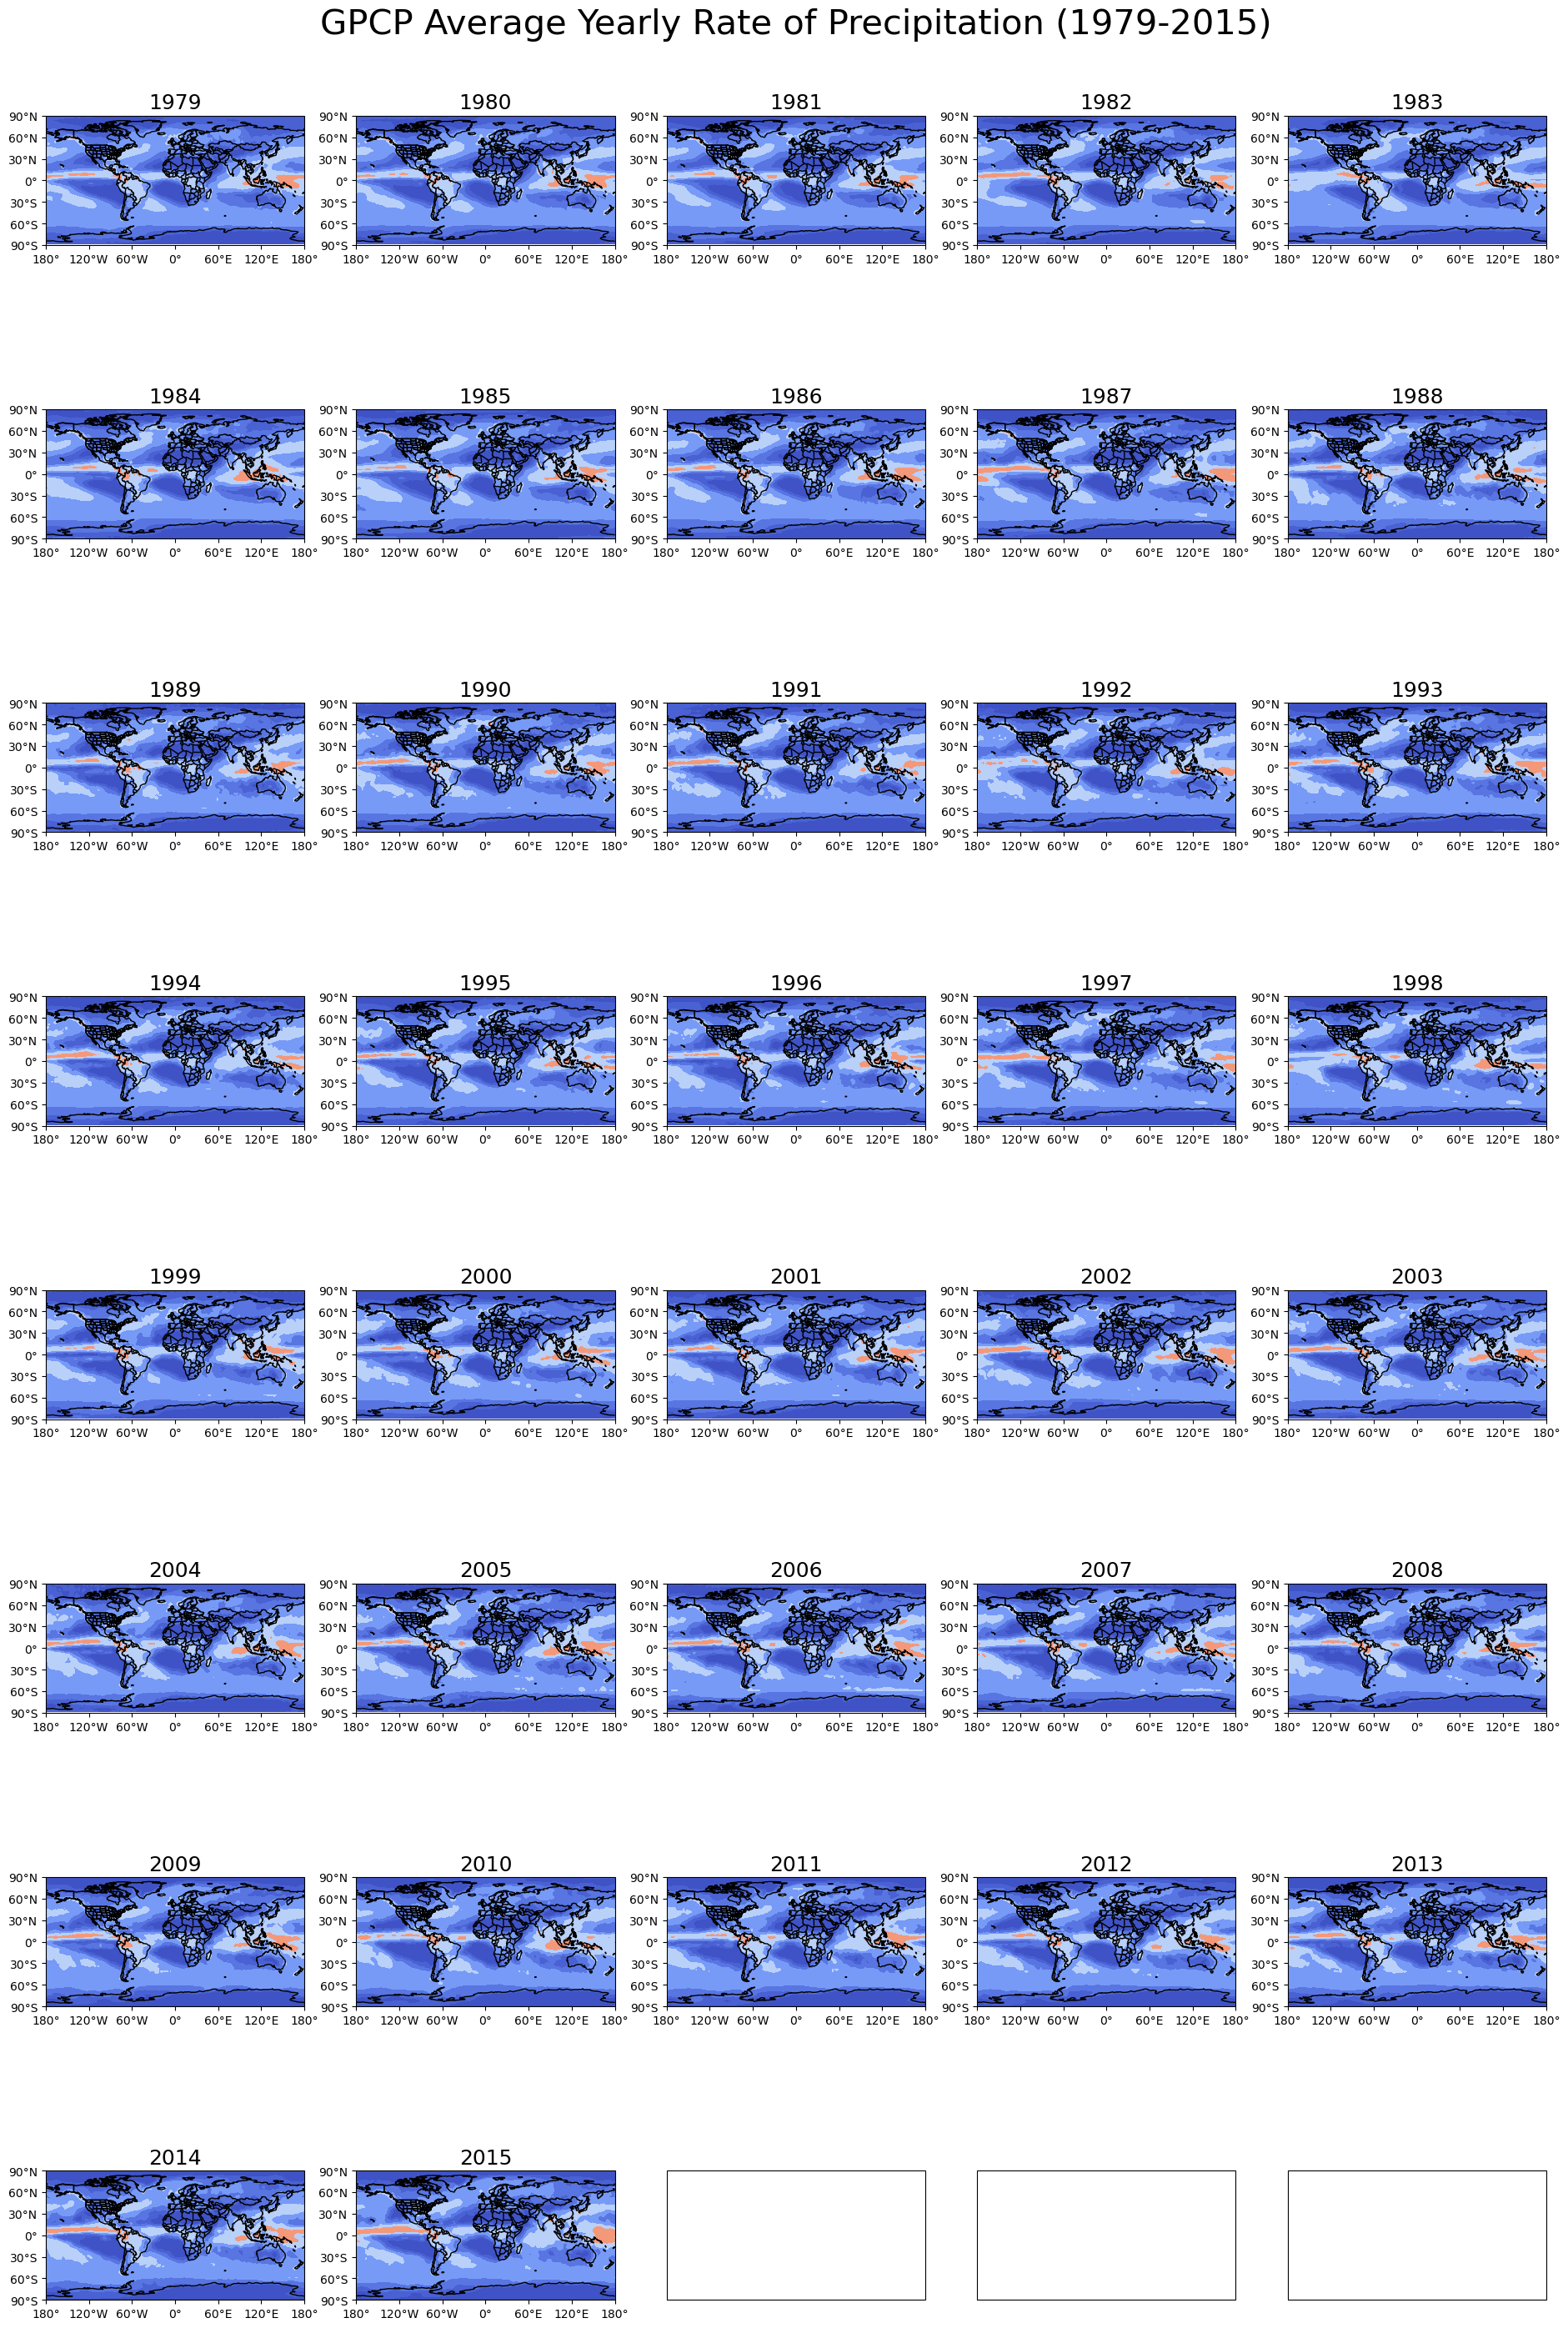

In [11]:
fig, axs = plt.subplots(nrows=8,ncols=5,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,30))
xlim=[-84,-74]
ylim=[36,40]
fig.tight_layout()
clevs=np.arange(-5,36,5)
axs=axs.flatten()
for i,yr in enumerate(ds_gpcp_year['year']):
    data=ds_gpcp_year['precip'].sel(year=yr)
    data,lons=add_cyclic_point(data,coord=ds_gpcp_year['lon'])
    cs=axs[i].contourf(lons,ds_gpcp_year['lat'],data,clevs,
                      transform = ccrs.PlateCarree(),
                      cmap='coolwarm',extend='max',levels=[0,0.5,1,2,4,8,16])
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_title(yr.values, fontsize=18)
    axs[i].coastlines()
    axs[i].add_feature(feature.BORDERS)
    axs[i].add_feature(feature.STATES)
    axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.5)
#cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
#cbar=fig.colorbar(cs, cax=cbar_ax,orientation='vertical',label='mm/day', shrink=0.6)
plt.suptitle('GPCP Average Yearly Rate of Precipitation (1979-2015)', fontsize=30)

fig.savefig('gpcp_1979-2015.png', bbox_inches='tight')